# DDoS Network Intrusion Detection and Classification

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [3]:
from __future__ import print_function
import time

In [4]:
# This extension for sound notification and cell completion time
get_ipython().magic('load_ext cellevents')

## Loading dataframe with all attacks

In [5]:
# Data after EDA
df_clean = pd.read_csv('mydata/all_dfclean.csv')

time: 10.8 s


In [6]:
# Run df_clean for running models and further anlyses
all_df = df_clean.copy()

time: 294 ms


In [7]:
# Destination Port and Source Port will be dropped as they're both identifier variables 
all_df = all_df.drop(columns=[' Destination Port', ' Source Port', 'Unnamed: 0'])

time: 1.08 s


### EDA

In [8]:
#Taking a 10 percent subset of the dataframe
df = pd.DataFrame.sample(all_df, frac=0.50, replace=True )

time: 1.39 s


In [9]:
df[' Label'].unique()

array([5, 3, 2, 4, 1, 0])

time: 13.1 ms


In [10]:
df.columns

Index([' Flow Duration', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Packet Length Variance', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' min_seg_size_forward', 'Active Mean',
       ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max',
       ' Idle Min', ' Label'],
      dtype='object')

time: 3.31 ms


In [11]:
df.shape

(1193402, 40)

time: 3.29 ms


In [12]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

time: 56.6 ms


### Converting multiclass to binary

In [13]:
pd.set_option('display.min_rows', None)

time: 621 µs


In [14]:
# Converting multiclass to binary
bin_df = df.replace({' Label': {1:'1', 2:'1', 3:'1', 4:'1', 5:'1', 0:'0'}})

time: 628 ms


In [15]:
# Converting to type int
bin_df[' Label'].astype(int)
pd.set_option('display.min_rows', None)

time: 117 ms


In [16]:
# Variable assignment
X = bin_df.iloc[:,:-1]
y = bin_df.iloc[:,-1]

time: 413 ms


In [17]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# Undersampling again
print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))


Original dataset shape Counter({'1': 1189401, '0': 4001})
Resampled dataset shape Counter({'0': 4001, '1': 4001})
time: 8.06 s


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

time: 13.1 ms


In [19]:
from sklearn.decomposition import PCA
# Instantiate & fit PCA model 
# Generate all 30 PCs
my_pca = PCA(n_components=3)
my_pca.fit(X_scaled)

# transform data 
X_PCA = my_pca.transform(X_scaled)

time: 35.8 ms


In [43]:
import seaborn
seaborn.set(style='ticks')

time: 1.85 ms


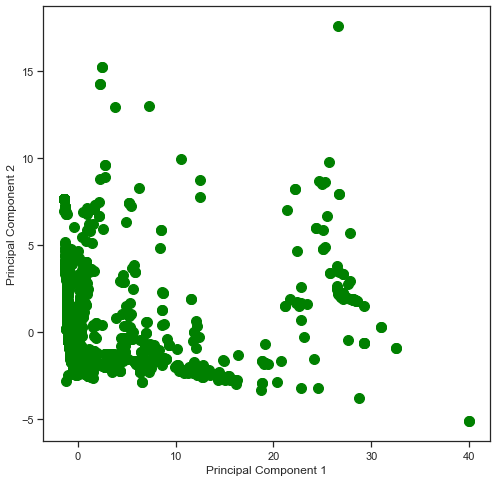

time: 263 ms


In [45]:
# Plotting the PCA-transformed data (only the first two dimensions)
plt.figure(figsize=(8, 8))


plt.scatter(X_PCA[:,0],X_PCA[:,1], c='green', s=100)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

In [21]:
from sklearn.manifold import TSNE
# tSNE with two components
# We need to scale the data since tSNE is also distance based

my_tSNE = TSNE(n_components=2)

X_tSNE = my_tSNE.fit_transform(X_scaled)

time: 36.6 s


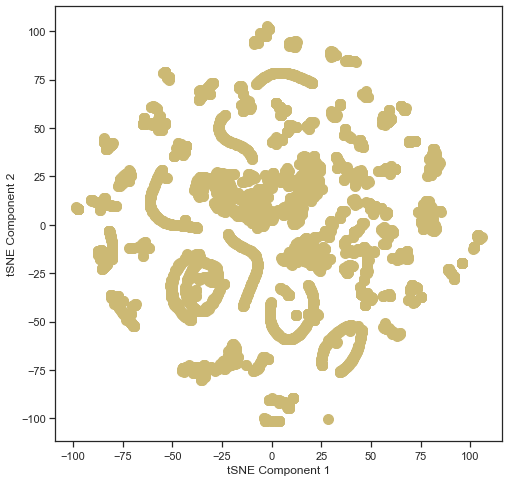

time: 307 ms


In [46]:
# Plotting the tSNE-transformed data (only the first two dimensions)
plt.figure(figsize=(8, 8))
plt.scatter(X_tSNE[:,0],X_tSNE[:,1], c='y', s=100)

plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")

plt.show()